# Participant ID:S01

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [2]:
## Read the CSV file into a DataFrame
S01_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S01_final_df.csv'

S01_df = pd.read_csv(S01_path, index_col=False, parse_dates=['DateTime'])

In [5]:
S01_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [7]:
# Set 'DateTime' column as the index
S01_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S01_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Temp(C)_N1_min', 'Temp(C)_N1_max', 'Temp(C)_N1_avg',
                                            'RH(%)_N1_min', 'RH(%)_N1_max', 'RH(%)_N1_avg'])

# Print the results as a table
print(results_df)

   ID_instance          Start Time            End Time        Duration  \
0        S01_1 2023-09-07 06:50:36 2023-09-07 07:26:41 0 days 00:36:05   
1       S01_10 2023-09-23 14:25:55 2023-09-23 15:05:39 0 days 00:39:44   
2       S01_11 2023-09-25 06:23:58 2023-09-25 06:58:44 0 days 00:34:46   
3       S01_12 2023-09-25 09:23:07 2023-09-25 09:39:56 0 days 00:16:49   
4       S01_13 2023-09-25 15:57:10 2023-09-25 16:19:56 0 days 00:22:46   
5       S01_14 2023-09-26 06:49:19 2023-09-26 07:34:14 0 days 00:44:55   
6       S01_15 2023-09-26 08:21:33 2023-09-26 12:00:36 0 days 03:39:03   
7       S01_16 2023-09-27 06:17:43 2023-09-27 06:52:46 0 days 00:35:03   
8       S01_17 2023-09-27 12:53:27 2023-09-27 13:13:09 0 days 00:19:42   
9       S01_18 2023-09-27 13:46:25 2023-09-27 14:15:14 0 days 00:28:49   
10      S01_19 2023-09-28 04:17:20 2023-09-28 04:29:20 0 days 00:12:00   
11       S01_2 2023-09-08 14:26:47 2023-09-08 15:13:27 0 days 00:46:40   
12      S01_20 2023-09-28 19:02:45 202

In [4]:
# Group by 'id_instance' and calculate time duration
time_duration = S01_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S01_1      36.08
S01_10     39.73
S01_11     34.77
S01_12     16.82
S01_13     22.77
S01_14     44.92
S01_15    219.05
S01_16     35.05
S01_17     19.70
S01_18     28.82
S01_19     12.00
S01_2      46.67
S01_20      8.07
S01_21     24.80
S01_3      29.05
S01_4      27.77
S01_5      33.55
S01_6      52.32
S01_7     592.45
S01_8      14.25
S01_9     212.92
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_43436\4024322672.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S01_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [5]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S01_df.drop(S01_df[S01_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S01_df.isnull().sum()

ID_instance          20
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [7]:
S01_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S01_df['ID_instance'].unique()

array(['S01_1', 'S01_2', 'S01_3', 'S01_4', 'S01_5', 'S01_6', 'S01_8',
       'S01_10', 'S01_11', 'S01_12', 'S01_13', 'S01_14', 'S01_16',
       'S01_17', 'S01_18', 'S01_19', 'S01_20', 'S01_21'], dtype=object)

In [9]:
S01_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S01_df = S01_df.filter(regex='^(?!acc_)')

In [11]:
S01_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S01_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S01_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S01_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S01_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,-0.233747,0.258428,-0.194292,-0.218039,0.235329,-0.197996,-0.233682,0.253732,-0.196464,-0.232091,0.253751,-0.196726
hrv_lf,0.071831,-0.096152,-0.036089,0.094735,-0.119733,-0.045259,0.072087,-0.102562,-0.037671,0.071645,-0.101803,-0.038460
hrv_hf,0.202845,-0.227439,0.138564,0.201673,-0.226559,0.129667,0.203574,-0.231630,0.138104,0.199046,-0.228859,0.137119
hrv_sdnn,0.206933,-0.313669,0.010586,0.236861,-0.340306,0.000068,0.207523,-0.323408,0.008837,0.204075,-0.321009,0.007916
hrv_rmssd,0.237098,-0.412444,0.000413,0.270960,-0.438875,-0.008958,0.237530,-0.422464,-0.001180,0.234254,-0.420203,-0.001849
hrv_mean_nni,0.065640,-0.299735,0.100647,0.110265,-0.323227,0.085456,0.065811,-0.308072,0.100882,0.063543,-0.307119,0.100417
hrv_median_nni,0.058668,-0.281160,0.117332,0.104462,-0.303306,0.101797,0.058787,-0.289225,0.117707,0.056897,-0.288403,0.117388
hrv_range_nni,0.184092,-0.253260,0.065067,0.215127,-0.274230,0.057611,0.184803,-0.262753,0.063232,0.181292,-0.260680,0.062305
hrv_entropy,-0.126176,0.374879,-0.058383,-0.112202,0.355784,-0.051777,-0.126372,0.376122,-0.059181,-0.123867,0.374278,-0.059121
eda_tonic_mean,0.160797,-0.405703,0.156118,0.139859,-0.369283,0.164240,0.161241,-0.403280,0.156758,0.161119,-0.403207,0.157212


### Correlation heatmap

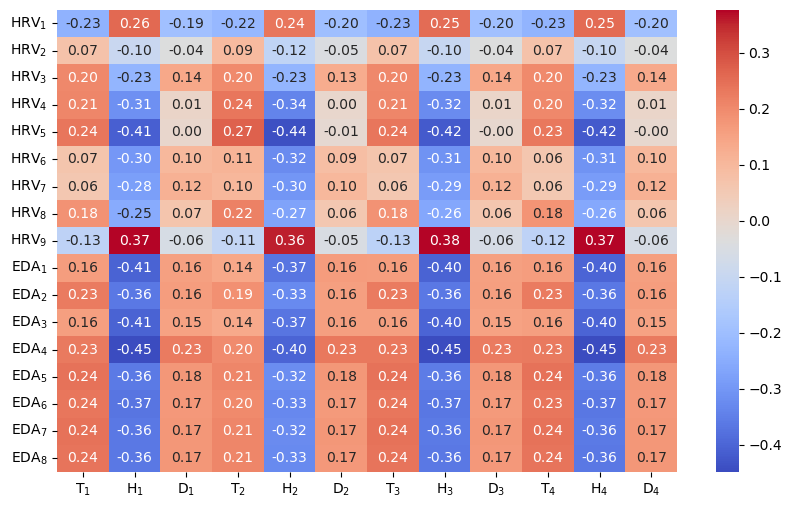

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S01')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S01_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S01_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [16]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S01_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S01_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S01_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S01_df['Temp(C)_N1'].quantile(0.30), S01_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S01_df['RH(%)_N1'].quantile(0.30), S01_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S01_df['lambda'] = S01_df.apply(comfort_label, axis=1)
label_counts = S01_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S01.pkl'
S01_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_rmssd
EDA Variable: eda_tonic_energy
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.5    62.244446
0.0    34.796506
1.0     2.959048
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_43436\971050066.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S01_df['lambda'] = S01_df.apply(comfort_label, axis=1)


In [20]:
# Group by unique instances
instance_groups = S01_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S01_1     0.278624
S01_10    0.500000
S01_11    0.500000
S01_12    0.500000
S01_13    0.500000
S01_14    0.673405
S01_16    0.500000
S01_17    0.500000
S01_18    0.500000
S01_19    0.500000
S01_2     0.000000
S01_20    0.500000
S01_21    0.500000
S01_3     0.064507
S01_4     0.165867
S01_5     0.000000
S01_6     0.087898
S01_8     0.500000
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [9]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [10]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_3", "Start Time": "2023-09-08 21:01:50", "End Time": "2023-09-08 21:30:53"},
    {"ID_instance": "S01_4", "Start Time": "2023-09-10 07:49:53", "End Time": "2023-09-10 08:17:39"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"},
    {"ID_instance": "S01_7*", "Start Time": "2023-09-15 14:09:02", "End Time": "2023-09-16 00:01:29"},
    {"ID_instance": "S01_8", "Start Time": "2023-09-22 15:53:28", "End Time": "2023-09-22 16:07:43"},
    {"ID_instance": "S01_9*", "Start Time": "2023-09-23 08:24:02", "End Time": "2023-09-23 11:56:57"},
    {"ID_instance": "S01_10", "Start Time": "2023-09-23 14:25:55", "End Time": "2023-09-23 15:05:39"},
    {"ID_instance": "S01_11", "Start Time": "2023-09-25 06:23:58", "End Time": "2023-09-25 06:58:44"},
    {"ID_instance": "S01_12", "Start Time": "2023-09-25 09:23:07", "End Time": "2023-09-25 09:39:56"},
    {"ID_instance": "S01_13", "Start Time": "2023-09-25 15:57:10", "End Time": "2023-09-25 16:19:56"},
    {"ID_instance": "S01_14", "Start Time": "2023-09-26 06:49:19", "End Time": "2023-09-26 07:34:14"},
    {"ID_instance": "S01_15*", "Start Time": "2023-09-26 08:21:33", "End Time": "2023-09-26 12:00:36"},
    {"ID_instance": "S01_16", "Start Time": "2023-09-27 06:17:43", "End Time": "2023-09-27 06:52:46"},
    {"ID_instance": "S01_17", "Start Time": "2023-09-27 12:53:27", "End Time": "2023-09-27 13:13:09"},
    {"ID_instance": "S01_18", "Start Time": "2023-09-27 13:46:25", "End Time": "2023-09-27 14:15:14"},
    {"ID_instance": "S01_19", "Start Time": "2023-09-28 04:17:20", "End Time": "2023-09-28 04:29:20"},
    {"ID_instance": "S01_20", "Start Time": "2023-09-28 19:02:45", "End Time": "2023-09-28 19:10:49"},
    {"ID_instance": "S01_21", "Start Time": "2023-09-29 06:30:59", "End Time": "2023-09-29 06:55:47"}
]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S01_1,2023-09-07 06:50:36,2023-09-07 07:26:41
1,S01_2,2023-09-08 14:26:47,2023-09-08 15:13:27
2,S01_3,2023-09-08 21:01:50,2023-09-08 21:30:53
3,S01_4,2023-09-10 07:49:53,2023-09-10 08:17:39
4,S01_5,2023-09-12 15:51:01,2023-09-12 16:24:34


In [26]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S01_1,18.83,19.48,19.096667,65.87,67.21,66.506667,24.790000
1,S01_2,28.15,29.59,28.706000,33.18,36.25,34.644000,820.722000
2,S01_3,22.82,23.27,23.090000,35.61,36.91,36.190000,0.000000
3,S01_4,15.56,17.45,16.406667,57.01,62.45,60.260000,126.003333
4,S01_5,29.27,30.26,29.850000,25.26,28.52,26.280000,569.106667
5,S01_6,17.68,17.91,17.806667,99.31,99.37,99.341667,13.468333
6,S01_7*,18.32,28.68,23.420333,36.95,86.63,59.105833,233.508500
7,S01_8,26.07,26.47,26.250000,35.25,37.89,36.770000,421.260000
8,S01_9*,15.75,21.15,18.291905,47.11,79.13,64.600000,369.009048
9,S01_10,21.82,23.55,22.442500,36.53,42.26,40.500000,268.550000


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [28]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ('2023-09-07 08:00:00', '2023-09-07 18:00:00'),
    ('2023-09-08 08:00:00', '2023-09-08 18:00:00'),
    ('2023-09-08 08:00:00', '2023-09-08 18:00:00'),
    ('2023-09-10 08:00:00', '2023-09-10 18:00:00'),
    ('2023-09-12 08:00:00', '2023-09-12 18:00:00'),
    ('2023-09-15 08:00:00', '2023-09-15 18:00:00'),
    ('2023-09-15 08:00:00', '2023-09-16 18:00:00'),
    ('2023-09-22 08:00:00', '2023-09-22 18:00:00'),
    ('2023-09-23 08:00:00', '2023-09-23 18:00:00'),
    ('2023-09-23 08:00:00', '2023-09-23 18:00:00'),
    ('2023-09-25 08:00:00', '2023-09-25 18:00:00'),
    ('2023-09-25 08:00:00', '2023-09-25 18:00:00')
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-09-07 08:00:00 to 2023-09-07 18:00:00,20.66,28.49,25.615410,31.54,63.26,42.017049,655.213443
1,2023-09-08 08:00:00 to 2023-09-08 18:00:00,21.19,29.59,26.678852,32.58,60.84,41.980000,630.621803
2,2023-09-08 08:00:00 to 2023-09-08 18:00:00,21.19,29.59,26.678852,32.58,60.84,41.980000,630.621803
3,2023-09-10 08:00:00 to 2023-09-10 18:00:00,16.00,31.47,26.785410,22.09,61.53,34.298197,636.719180
4,2023-09-12 08:00:00 to 2023-09-12 18:00:00,17.34,30.99,26.130328,24.10,72.22,39.060328,608.635246
5,2023-09-15 08:00:00 to 2023-09-15 18:00:00,18.01,28.68,24.083279,36.95,99.34,60.612787,597.891803
6,2023-09-15 08:00:00 to 2023-09-16 18:00:00,16.42,28.68,21.588341,36.95,99.34,73.515610,283.163122
7,2023-09-22 08:00:00 to 2023-09-22 18:00:00,18.22,28.08,24.175902,29.90,99.26,57.224590,408.840164
8,2023-09-23 08:00:00 to 2023-09-23 18:00:00,15.41,24.83,20.323607,32.45,85.32,52.922787,399.814754
9,2023-09-23 08:00:00 to 2023-09-23 18:00:00,15.41,24.83,20.323607,32.45,85.32,52.922787,399.814754


### Living Lab (Day of Commuting from 8am to 6pm):

In [19]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-09-07 08:00:00", "2023-09-07 18:00:00"),
    ("2023-09-08 08:00:00", "2023-09-08 18:00:00"),
    ("2023-09-08 08:00:00", "2023-09-08 18:00:00"),
    ("2023-09-10 08:00:00", "2023-09-10 18:00:00"),
    ("2023-09-12 08:00:00", "2023-09-12 18:00:00"),
    ("2023-09-15 08:00:00", "2023-09-15 18:00:00"),
    ("2023-09-15 08:00:00", "2023-09-16 18:00:00"),
    ("2023-09-22 08:00:00", "2023-09-22 18:00:00"),
    ("2023-09-23 08:00:00", "2023-09-23 18:00:00"),
    ("2023-09-23 08:00:00", "2023-09-23 18:00:00"),
    ("2023-09-25 08:00:00", "2023-09-25 18:00:00"),
    ("2023-09-25 08:00:00", "2023-09-25 18:00:00")
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'start_time': start,
        'end_time': end,
        'Temp_Air_min': filtered_data['Temp_Air(C)'].min(),
        'Temp_Air_max': filtered_data['Temp_Air(C)'].max(),
        'Temp_Air_avg': filtered_data['Temp_Air(C)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,start_time,end_time,Temp_Air_min,Temp_Air_max,Temp_Air_avg,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_percentage,Door_open_percentage
0,2023-09-07 08:00:00,2023-09-07 18:00:00,24.879395,28.069092,26.173220,30.513954,2191.927002,206.196351,4.399003,38.056270,100.0,50.000000
1,2023-09-08 08:00:00,2023-09-08 18:00:00,24.918701,29.896240,27.462044,32.421684,2191.927002,217.251132,11.216219,38.065751,100.0,45.833333
2,2023-09-08 08:00:00,2023-09-08 18:00:00,24.918701,29.896240,27.462044,32.421684,2191.927002,217.251132,11.216219,38.065751,100.0,45.833333
3,2023-09-10 08:00:00,2023-09-10 18:00:00,24.469971,29.883057,26.685846,30.997658,2191.927002,186.733807,4.267408,33.057129,100.0,0.000000
4,2023-09-12 08:00:00,2023-09-12 18:00:00,24.920166,29.222900,26.715444,32.890701,2191.927002,194.083712,5.766847,31.089354,100.0,1.666667
5,2023-09-15 08:00:00,2023-09-15 18:00:00,23.760742,29.612793,26.578198,27.451134,2191.927002,393.499472,15.686214,42.864559,100.0,40.000000
6,2023-09-15 08:00:00,2023-09-16 18:00:00,23.760742,29.612793,25.742533,1.316833,2191.927002,141.774465,26.041018,117.781288,100.0,12.009804
7,2023-09-22 08:00:00,2023-09-22 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000
8,2023-09-23 08:00:00,2023-09-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000
9,2023-09-23 08:00:00,2023-09-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000


# Living Lab (Before arrivel and after arrivel)

In [18]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-09-07 06:50:36", "2023-09-07 07:26:41"),
    ("2023-09-08 14:26:47", "2023-09-08 15:13:27"),
    ("2023-09-12 15:51:01", "2023-09-12 16:24:34"),
    ("2023-09-15 06:49:48", "2023-09-15 07:42:07")

]



# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_%,Door_open_%
0,2023-09-07 06:50:36,2023-09-07 07:26:41,24.940186,25.035889,24.993687,25.800705,32.965279,29.477228,0.079635,1.807859,100.0,0.0
1,2023-09-08 14:26:47,2023-09-08 15:13:27,28.745605,29.896240,29.402271,281.828888,443.900116,402.005423,1.445279,3.366835,100.0,40.0
2,2023-09-12 15:51:01,2023-09-12 16:24:34,28.058105,28.582520,28.347029,267.596619,279.996490,272.443115,0.275311,1.727346,100.0,0.0
3,2023-09-15 06:49:48,2023-09-15 07:42:07,24.305420,24.414551,24.364063,10.327911,25.031662,17.712326,0.312383,2.637536,100.0,0.0


In [20]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'Before',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }

    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'After',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(  ID_instance Time_Interval          Start_Time            End_Time  \
 0       S01_1        Before 2023-09-15 06:49:48 2023-09-15 07:42:07   
 1       S01_2        Before 2023-09-15 06:49:48 2023-09-15 07:42:07   
 2       S01_5        Before 2023-09-15 06:49:48 2023-09-15 07:42:07   
 3       S01_6        Before 2023-09-15 06:49:48 2023-09-15 07:42:07   
 
    Min_Temp_Air  Max_Temp_Air  Avg_Temp_Air   Illu_min   Illu_max   Illu_avg  \
 0      24.30542     24.414551     24.364063  10.327911  25.031662  17.712326   
 1      24.30542     24.414551     24.364063  10.327911  25.031662  17.712326   
 2      24.30542     24.414551     24.364063  10.327911  25.031662  17.712326   
 3      24.30542     24.414551     24.364063  10.327911  25.031662  17.712326   
 
    Ele1_sum  Ele2_sum  Window_open_%  Door_open_%  
 0  0.312383  2.637536          100.0          0.0  
 1  0.312383  2.637536          100.0          0.0  
 2  0.312383  2.637536          100.0          0.0  
 3  0.312383  2.637

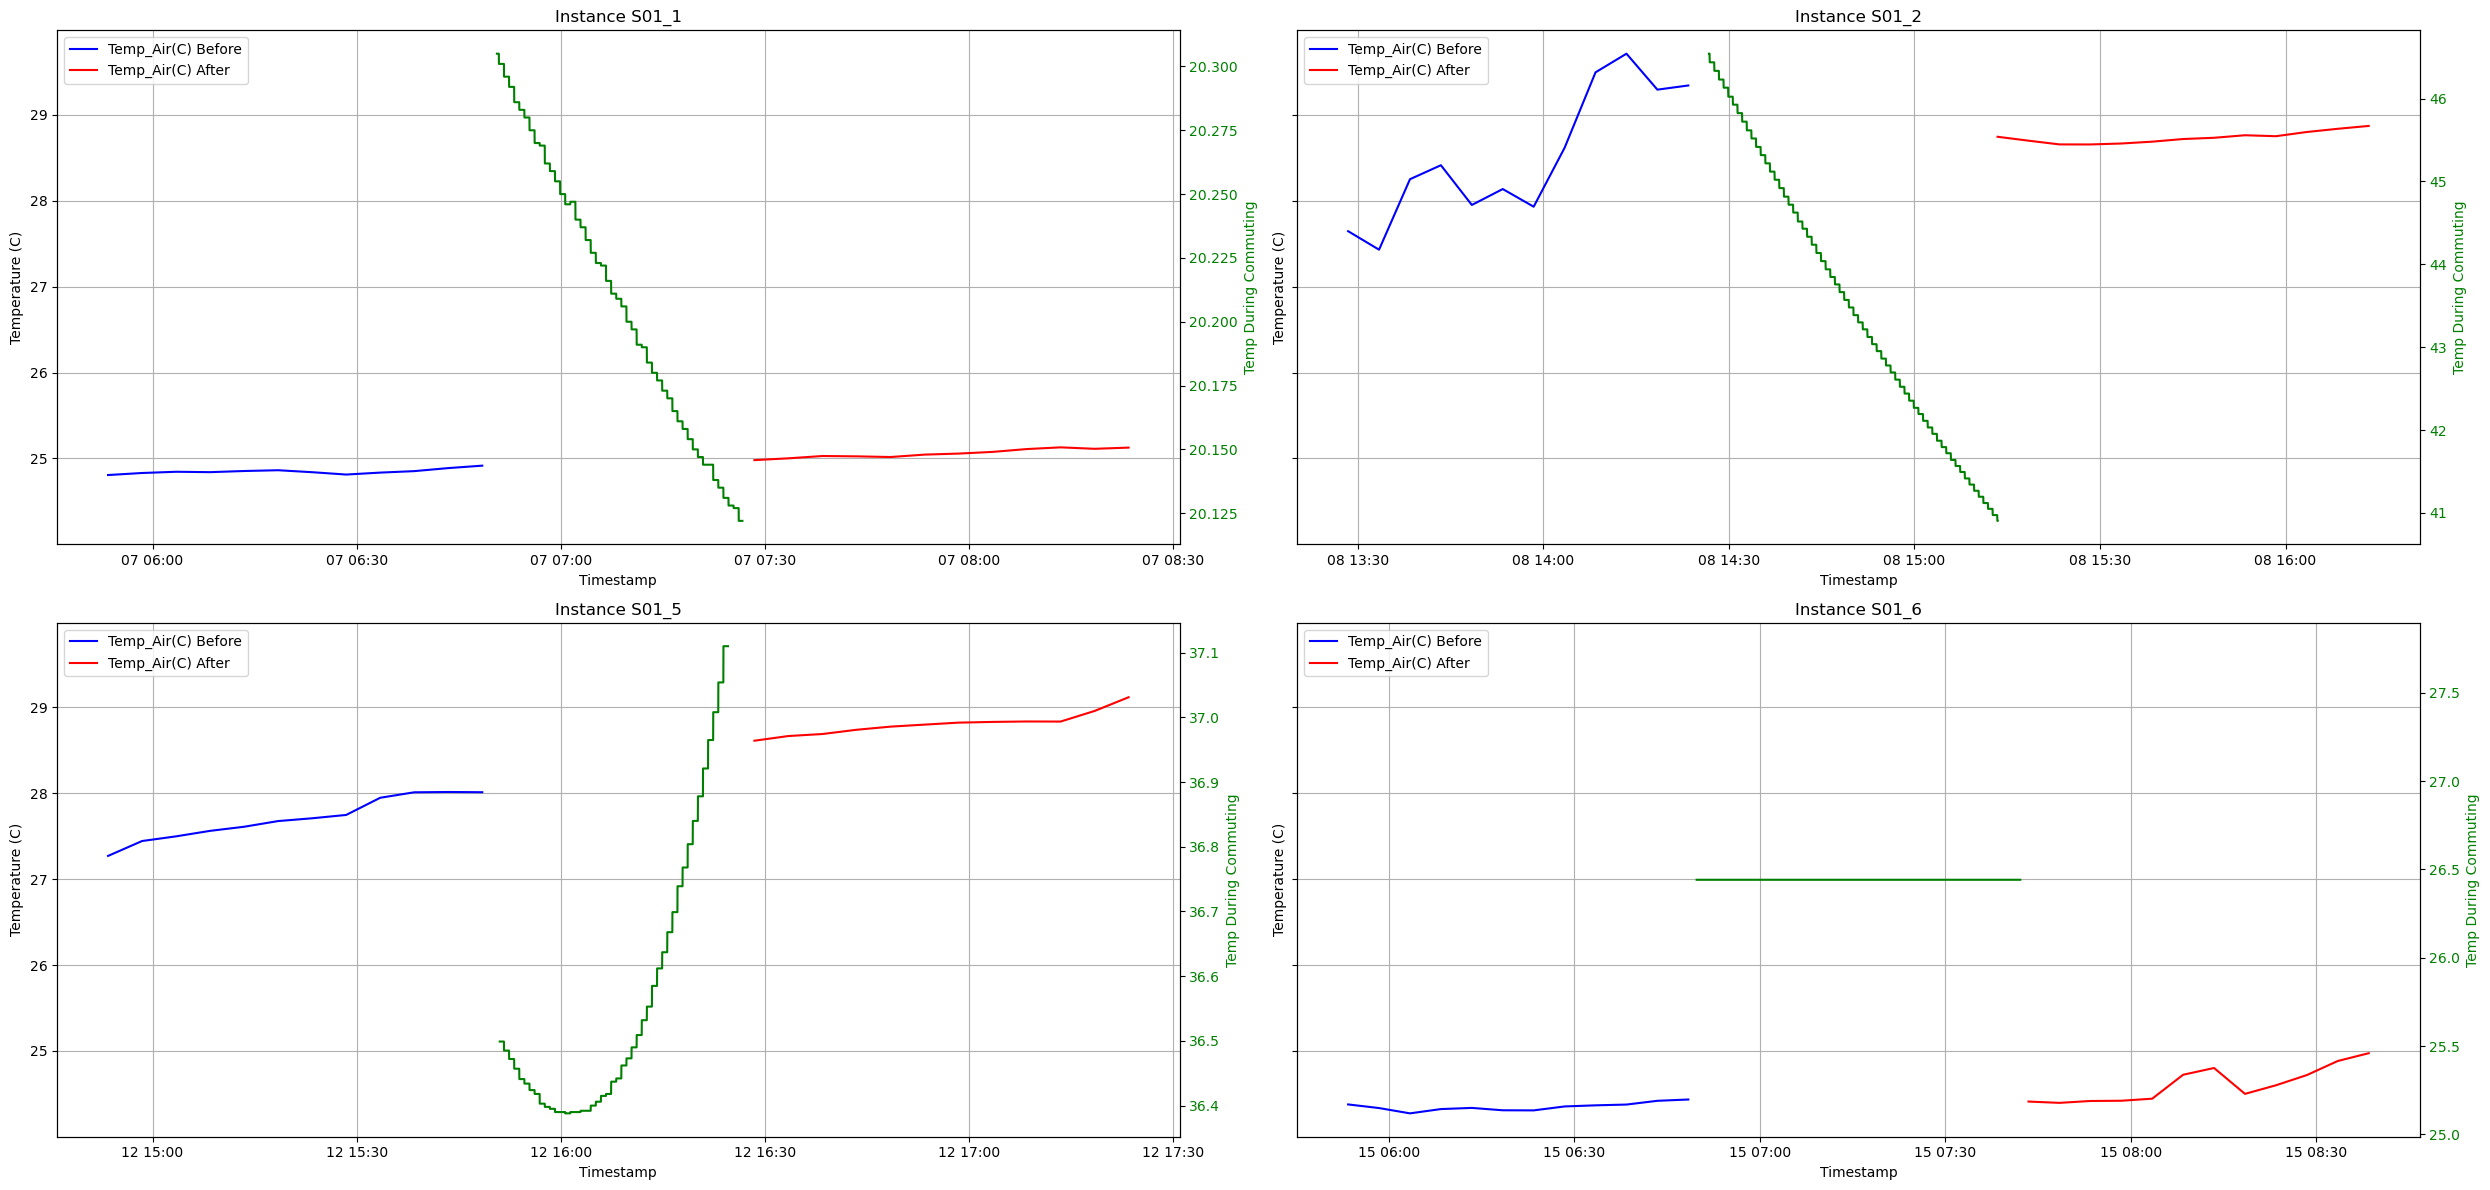

In [23]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'

data = pd.read_csv(data_file_path)
commuting_data = S01_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


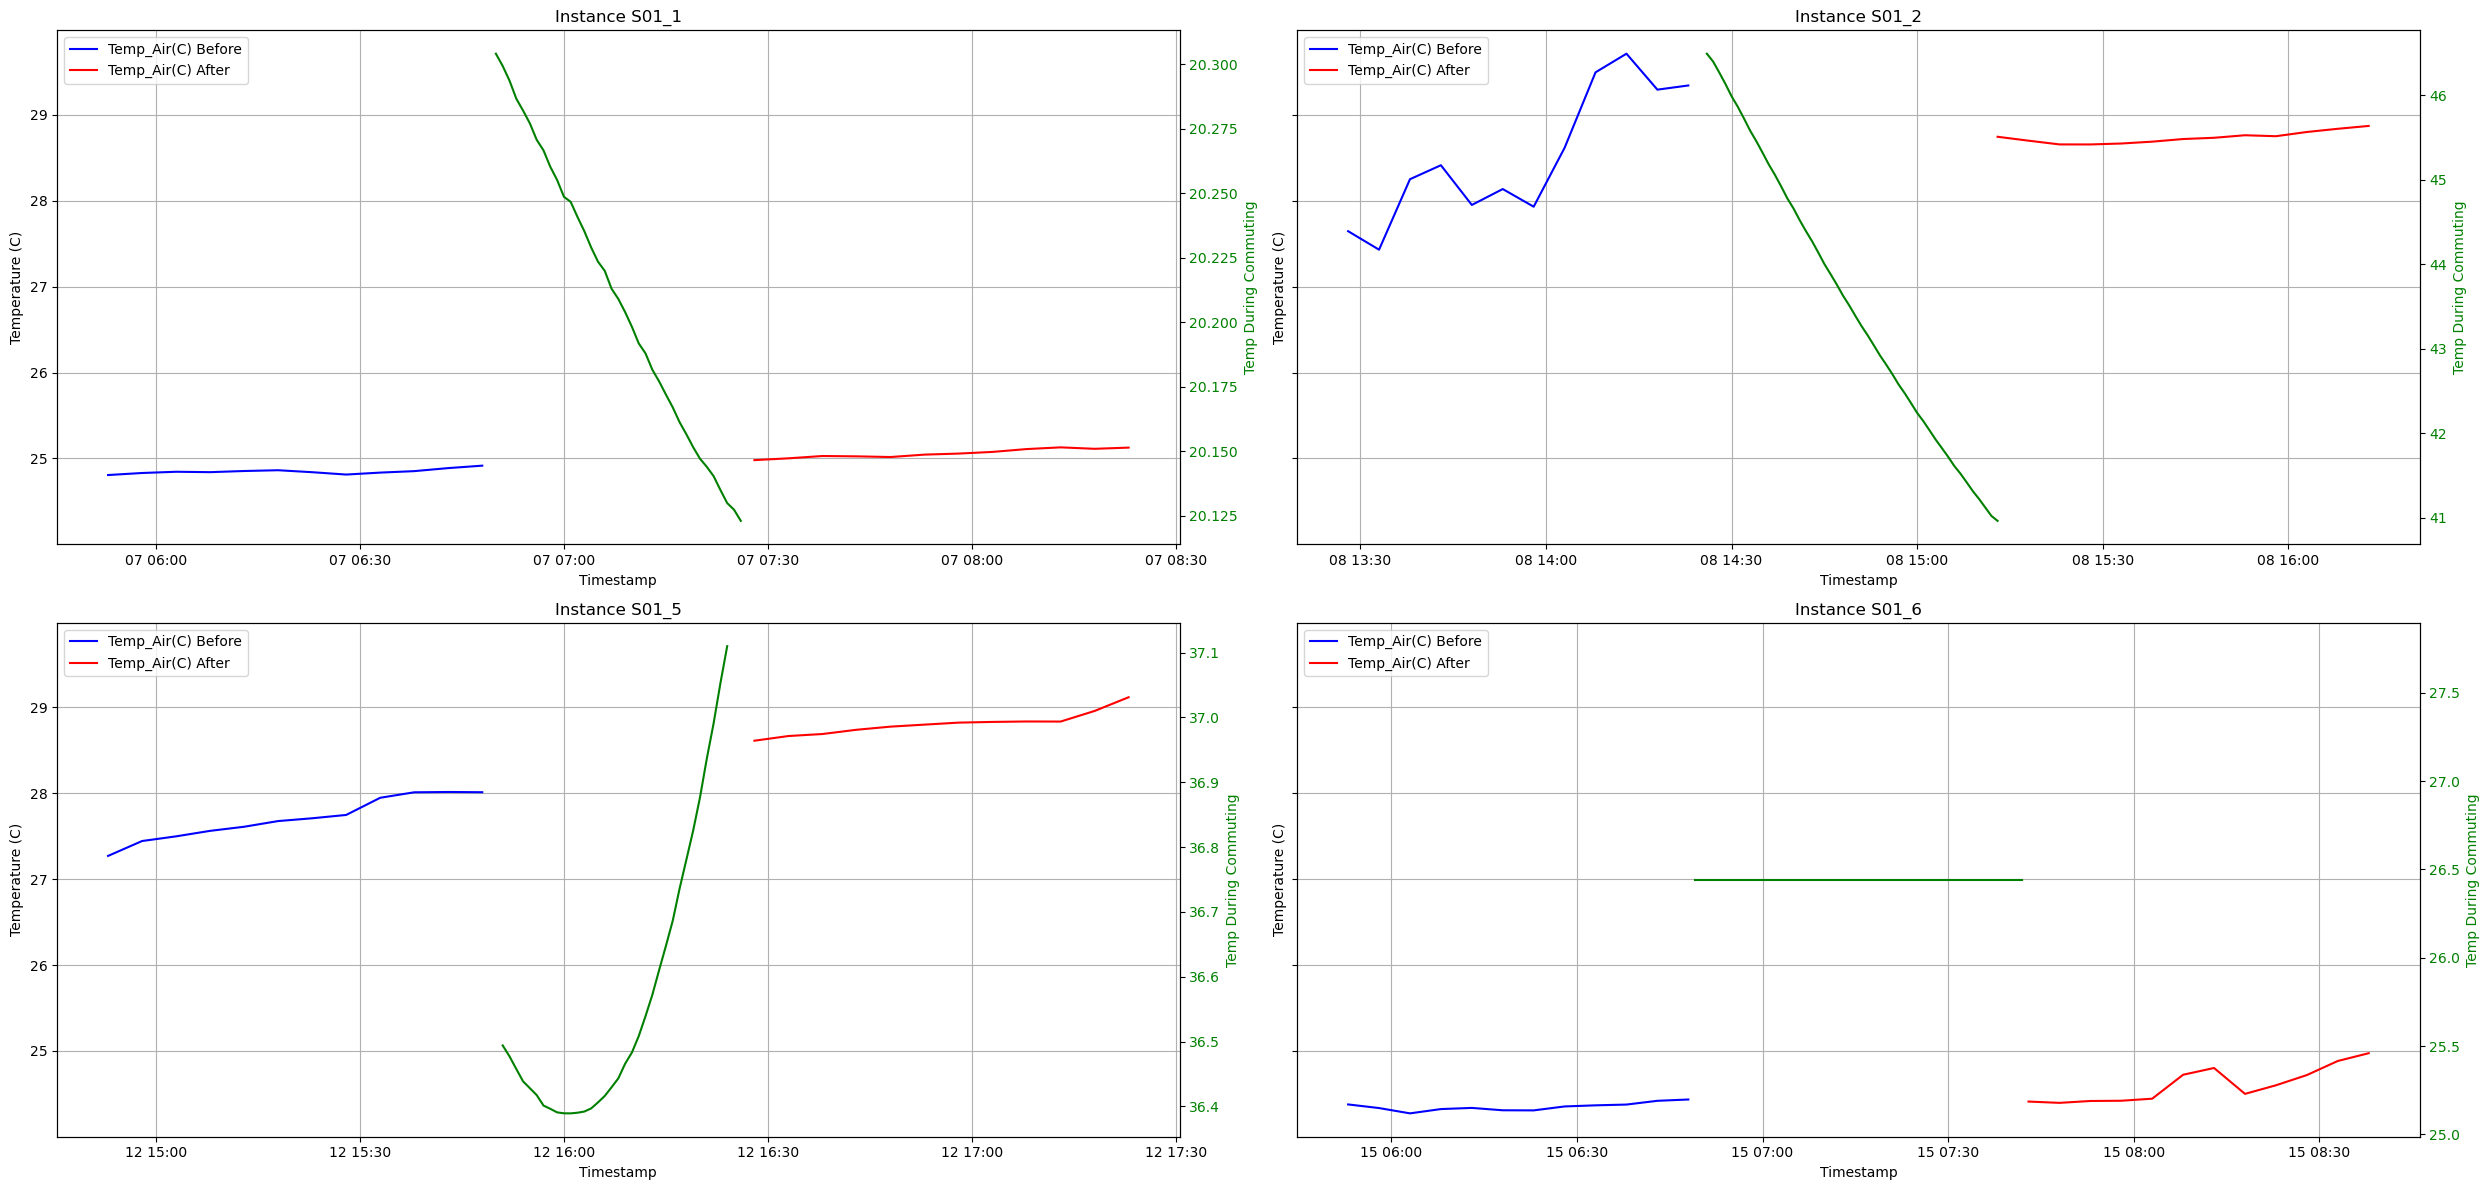

In [24]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'

data = pd.read_csv(data_file_path)
commuting_data = S01_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)

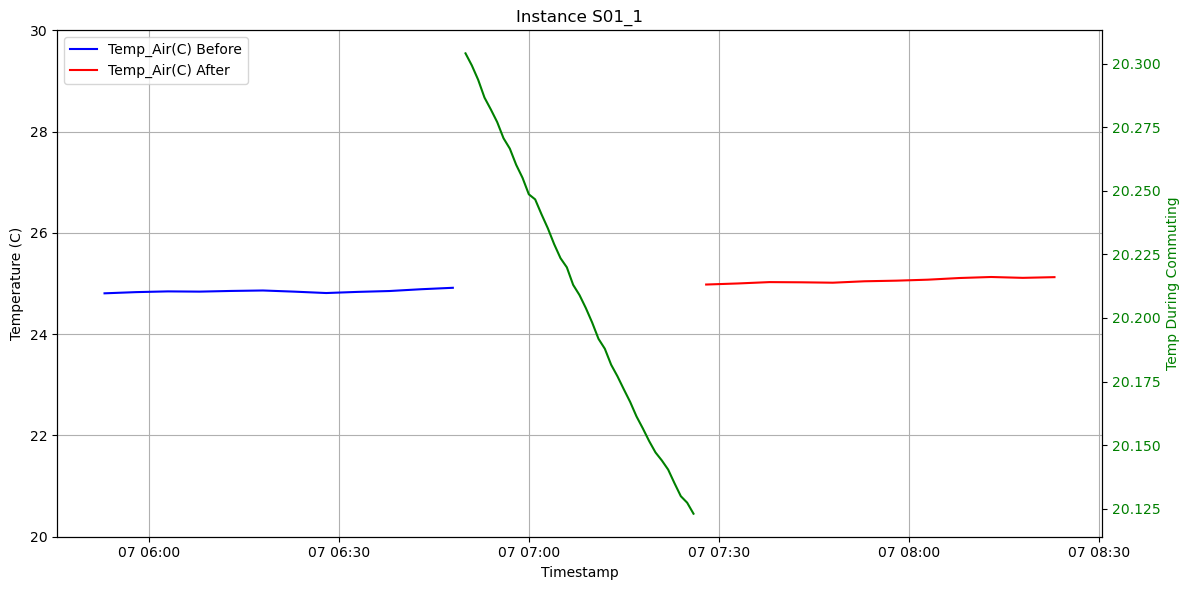

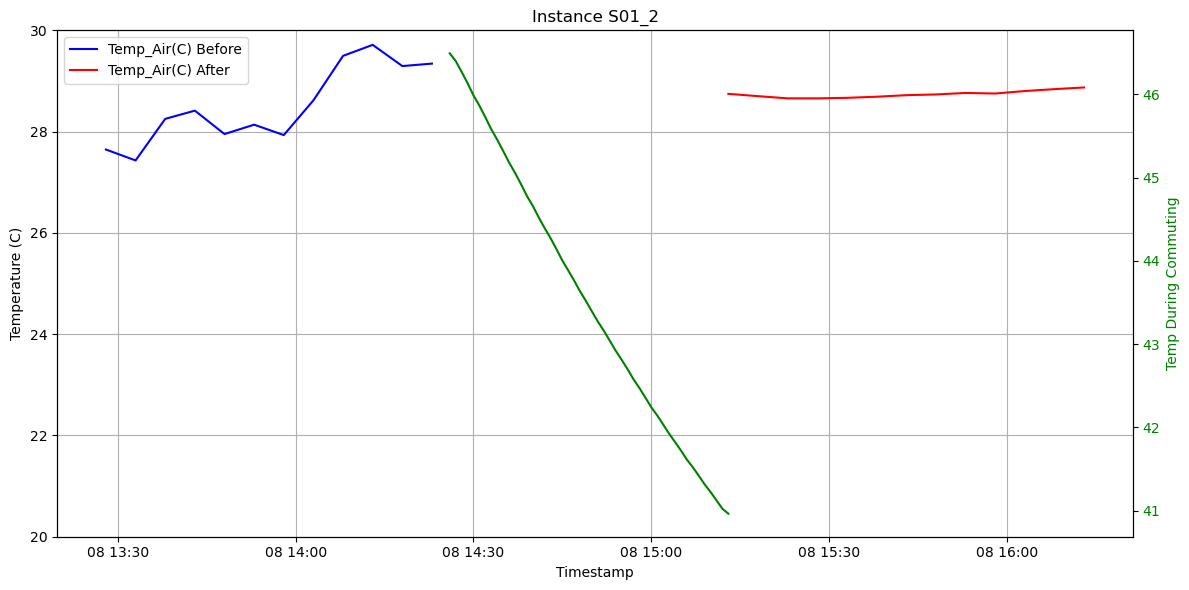

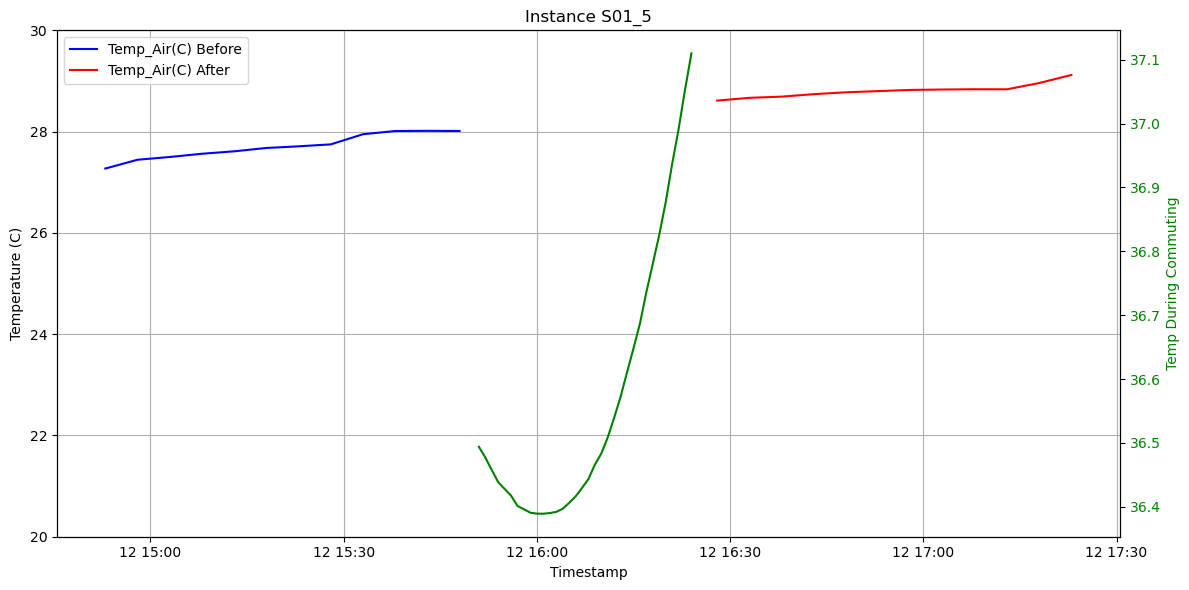

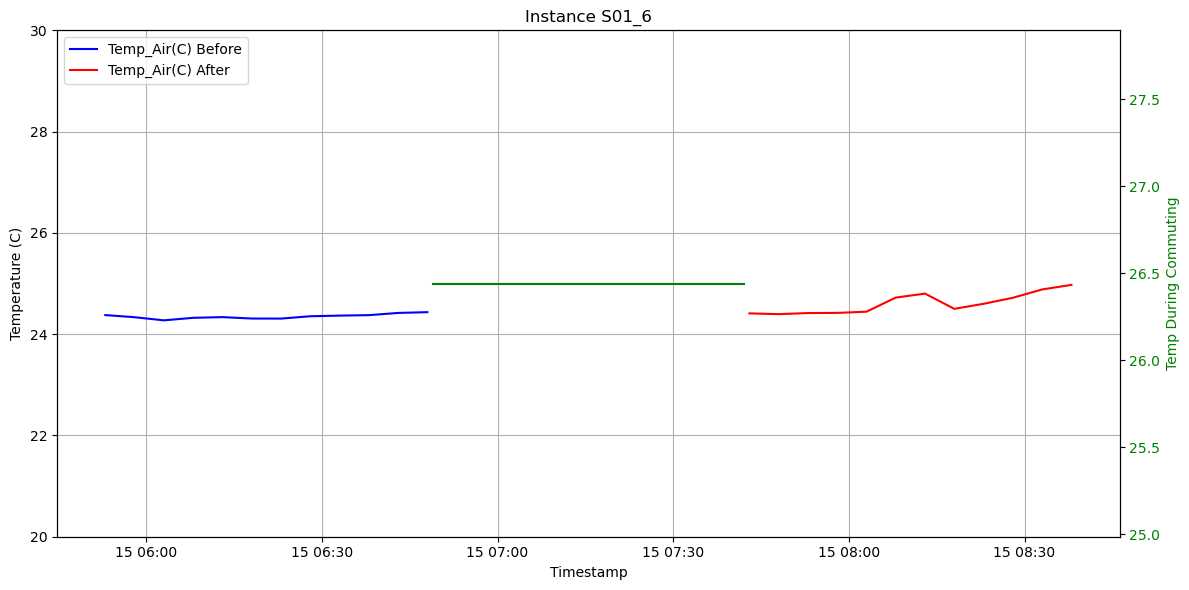

In [25]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'

data = pd.read_csv(data_file_path)
commuting_data = S01_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Set consistent y-axis limits for the primary y-axis
        ax.set_ylim(primary_y_axis_limits)

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


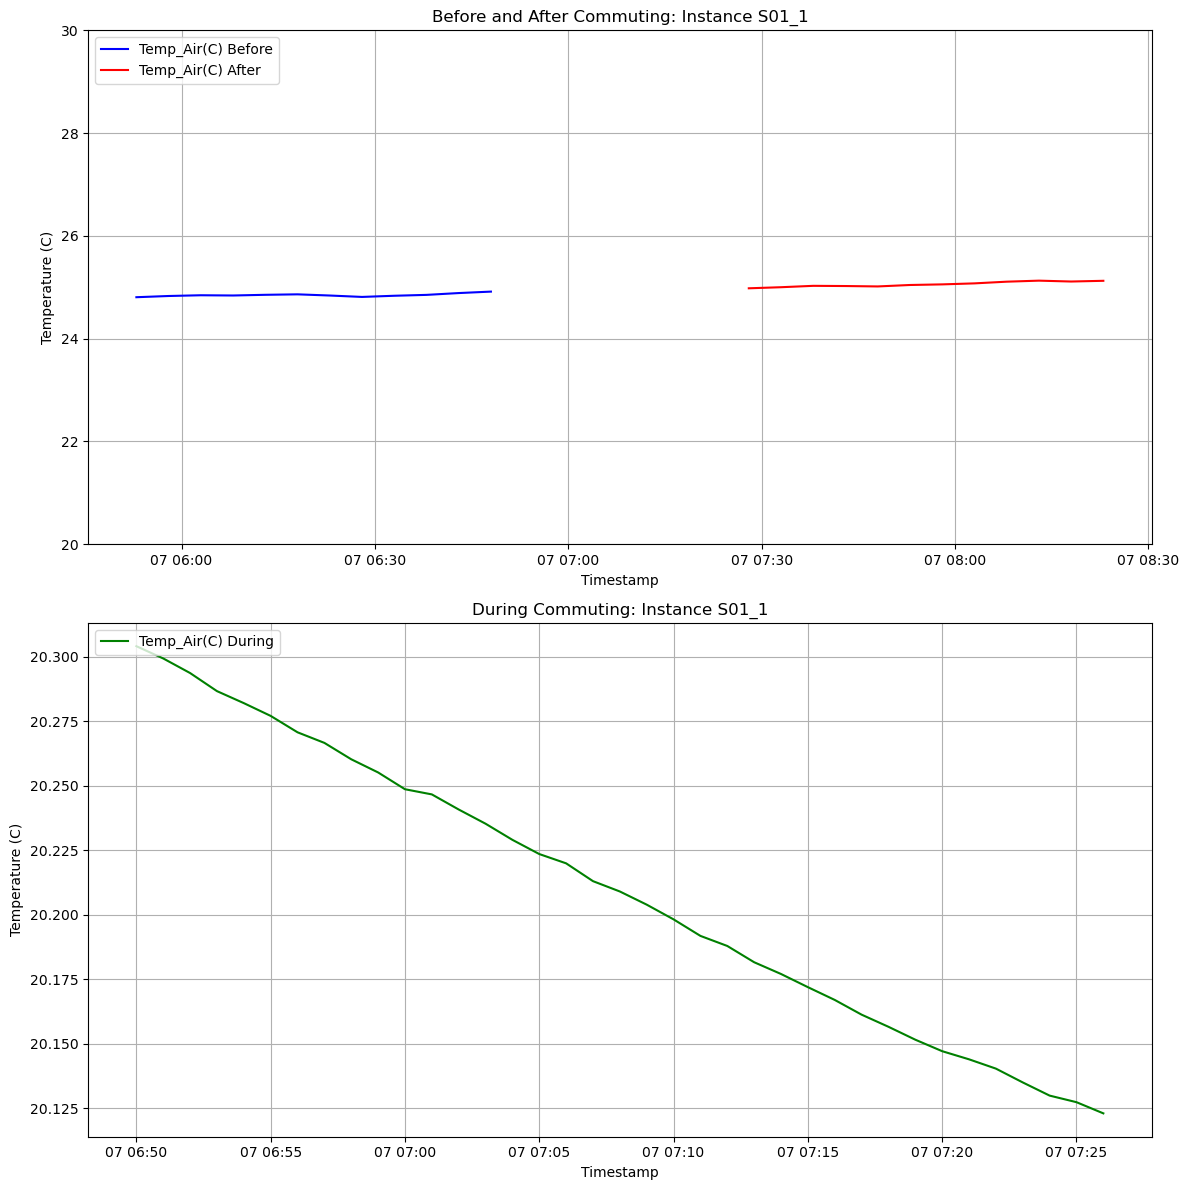

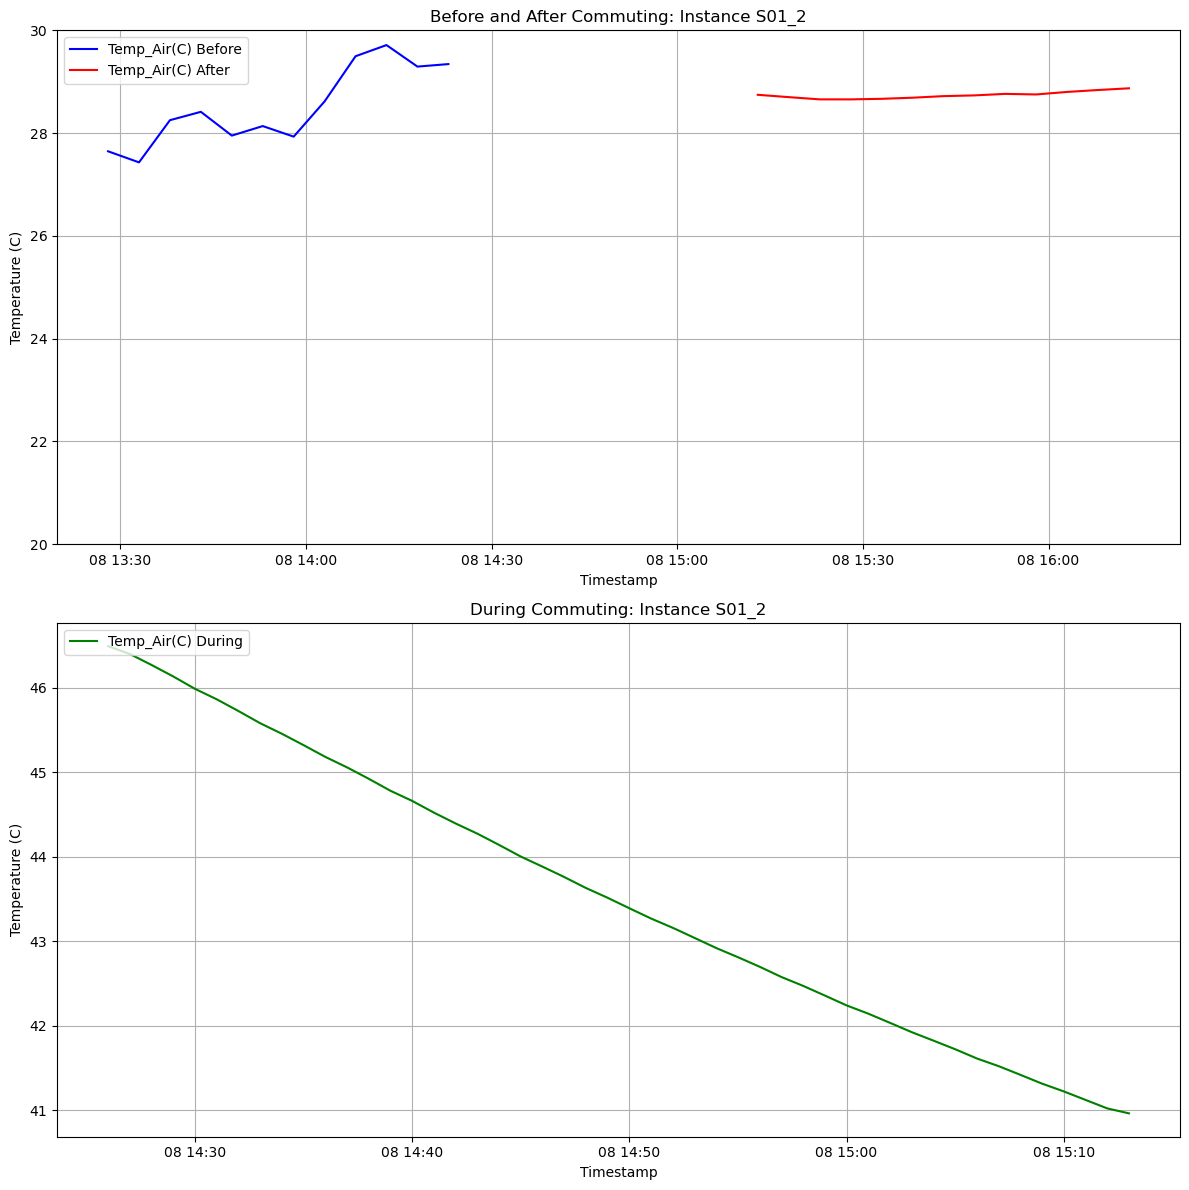

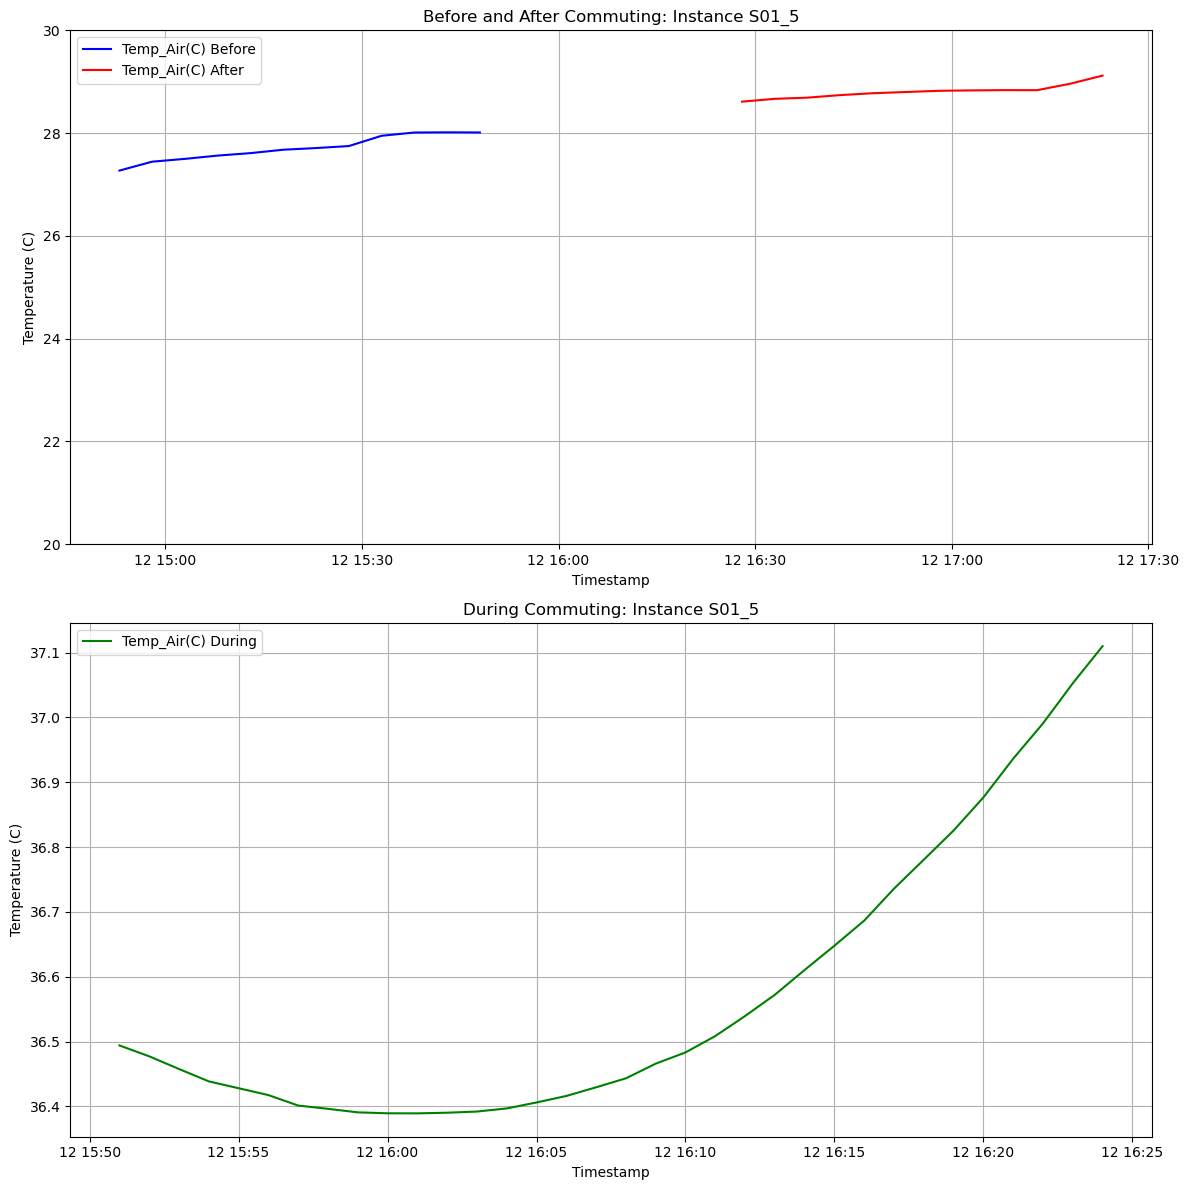

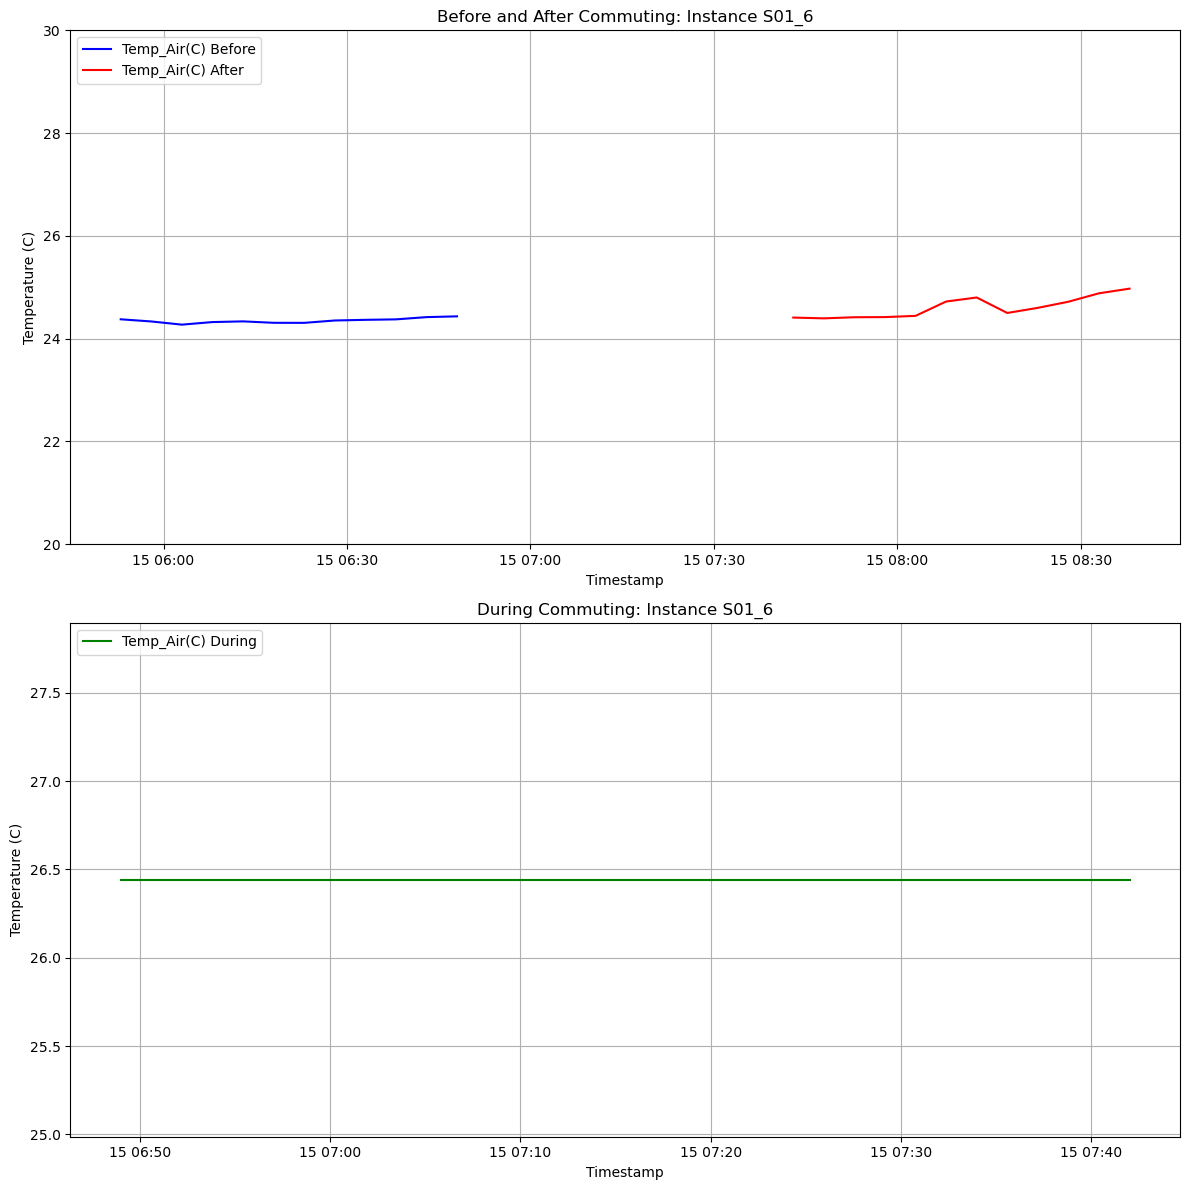

In [26]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_a.csv'

data = pd.read_csv(data_file_path)
commuting_data = S01_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S01_1", "Start Time": "2023-09-07 06:50:36", "End Time": "2023-09-07 07:26:41"},
    {"ID_instance": "S01_2", "Start Time": "2023-09-08 14:26:47", "End Time": "2023-09-08 15:13:27"},
    {"ID_instance": "S01_5", "Start Time": "2023-09-12 15:51:01", "End Time": "2023-09-12 16:24:34"},
    {"ID_instance": "S01_6", "Start Time": "2023-09-15 06:49:48", "End Time": "2023-09-15 07:42:07"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        # Plot Before and After Commuting on the first subplot
        ax1.plot(before_data.index, before_data['Temp_Air(C)'], label='Temp_Air(C) Before', color='blue')
        ax1.plot(after_data.index, after_data['Temp_Air(C)'], label='Temp_Air(C) After', color='red')
        ax1.set_ylim(primary_y_axis_limits)
        ax1.set_title(f'Before and After Commuting: Instance {instance_id}')
        ax1.set_xlabel('Timestamp')
        ax1.set_ylabel('Temperature (C)')
        ax1.legend(loc='upper left')
        ax1.grid(True)

        # Plot During Commuting on the second subplot
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_title(f'During Commuting: Instance {instance_id}')
        ax2.set_xlabel('Timestamp')
        ax2.set_ylabel('Temperature (C)')
        ax2.legend(loc='upper left')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
